In [8]:
# Import files
import numpy as np
import itertools

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

from scipy.stats import multivariate_normal

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize

In [9]:
# Load data

# Linearly Seperable
#data = np.loadtxt('./data/36_ls.txt')

# Non-Linearly Seperable
#data = np.loadtxt('./data/36_nls.txt')


# Non-Linearly Seperable
data = np.loadtxt('./data/group_36_real.txt')

In [10]:
# Split the data in three classes

# Linearly Seperable
cA = data[:500]
cB = data[500:1000]
cC = data[1000:]


# Non-Linearly Seperable
# cA = data[:1000]
# cB = data[1000:2000]
# cC = data[2000:]

In [11]:
# Split the data for each class into training and testing data

cA_train,cA_test,cB_train,cB_test,cC_train,cC_test = train_test_split(cA,cB,cC,test_size=0.3, random_state=42)
#cA_train,cA_valid,cB_train,cB_valid,cC_train,cC_valid = train_test_split(cA_train,cB_train,cC_train,test_size=0.22, random_state=42)

In [12]:
# Calculate mean vector for each class
mu_A = np.vstack((np.mean(cA_train[:,0]),np.mean(cA_train[:,1])))
mu_B = np.vstack((np.mean(cB_train[:,0]),np.mean(cB_train[:,1])))
mu_C = np.vstack((np.mean(cC_train[:,0]),np.mean(cC_train[:,1])))

# Calculate co-variance matrix for each class
cov_A = np.cov(cA_train[:,0],cA_train[:,1])
cov_B = np.cov(cB_train[:,0],cB_train[:,1])
cov_C = np.cov(cC_train[:,0],cC_train[:,1])

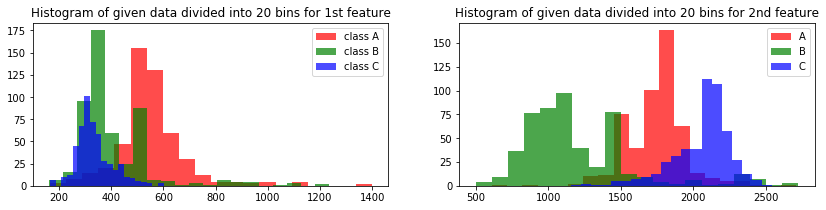

In [13]:
# Plot of feature 1 of each class
plt.figure(figsize=(14, 3))
plt.subplot(1,2,1)   
plt.hist(cA[:,0],20, alpha=0.7, label='class A', color='red')
plt.hist(cB[:,0],20, alpha=0.7, label='class B', color='green')
plt.hist(cC[:,0],20, alpha=0.7, label='class C', color='blue')
plt.title('Histogram of given data divided into 20 bins for 1st feature')
plt.legend()

# Plot of feature 2 of each class
plt.subplot(1,2,2)
plt.hist(cA[:,1],20, alpha=0.7, label='A', color='red')
plt.hist(cB[:,1],20, alpha=0.7, label='B', color='green')
plt.hist(cC[:,1],20, alpha=0.7, label='C', color='blue')
plt.title('Histogram of given data divided into 20 bins for 2nd feature')
plt.legend()
plt.show()

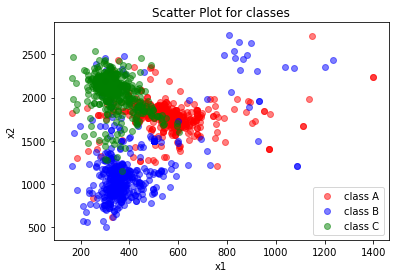

In [14]:
plt.scatter(cA[:,0], cA[:,1], c='red', alpha=0.5, label='class A')
plt.scatter(cB[:,0], cB[:,1], c='blue', alpha=0.5, label='class B')
plt.scatter(cC[:,0], cC[:,1], c='green', alpha=0.5, label='class C')
plt.title("Scatter Plot for classes")
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [15]:
# Implementation of Liklihood function
# Bivariate Gaussian Distribution
def likelihood(x1, x2, mu, cov):
    x = np.vstack((x1,x2))
    
    coeff = 1/(2*np.pi*np.linalg.det(cov)**0.5)
    exp_term = (np.e**(-0.5 * np.matmul(np.matmul(np.transpose((x-mu)), np.linalg.inv(cov)), (x-mu))))
    
    return (coeff * exp_term).reshape(1) #
    
    #return (1/(2*np.pi*np.linalg.det(cov)**0.5)* \
    #(np.e**(-0.5*np.matmul(np.matmul(np.transpose((x-mu)),np.linalg.inv(cov)),(x-mu)))) ).reshape(1) #

In [16]:
# Plot the likelihood for each class

X_axis = np.linspace(min(data[:,0]),max(data[:,0]),100)
Y_axis = np.linspace(min(data[:,1]),max(data[:,1]),100)

z1 = []
for x in X_axis:
    temp = []
    for y in Y_axis:
        temp.append(likelihood(x,y,mu_A,cov_A))
    z1.append(temp)
    
z2 = []
for x in X_axis:
    temp = []
    for y in Y_axis:
        temp.append(likelihood(x,y,mu_B,cov_B))
    z2.append(temp)

z3 = []
for x in X_axis:
    temp = []
    for y in Y_axis:
        temp.append(likelihood(x,y,mu_C,cov_C))
    z3.append(temp)

z1 = np.array(z1).reshape(100,100)
z2 = np.array(z2).reshape(100,100)
z3 = np.array(z3).reshape(100,100)

x,y = np.meshgrid(X_axis, Y_axis)

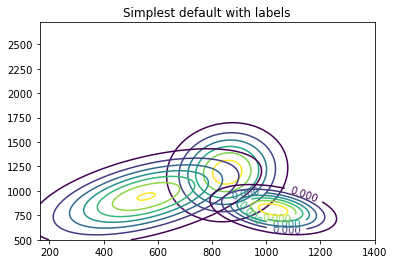

In [17]:
plt.figure()
CS = plt.contour(x, y, z1)
CS = plt.contour(x, y, z2)
CS = plt.contour(x, y, z3)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Simplest default with labels')

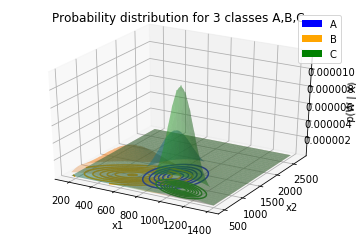

In [18]:
# Plot the likelihood for each class

from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')
x1off = min(X_axis)
x2off = max(Y_axis)



zoff = 0
ax.plot_surface(x, y, z1, rstride=3, cstride=3, alpha=0.3, label = 'A')
cset = ax.contour(x, y, z1, zdir='z', offset=zoff, colors="b")
#cset = ax.contour(x, y, z1, zdir='x', offset=x1off, colors="b")
#cset = ax.contour(x, y, z1, zdir='y', offset=x2off, colors="b")

ax.plot_surface(x, y, z2, rstride=3, cstride=3, alpha=0.3, label = 'B')
cset = ax.contour(x, y, z2, zdir='z', offset=zoff, colors="orange")
#cset = ax.contour(x, y, z2, zdir='x', offset=x1off, colors="orange")
#cset = ax.contour(x, y, z2, zdir='y', offset=x2off, colors="orange")

ax.plot_surface(x, y, z3, rstride=3, cstride=3, alpha=0.3, label = 'C')
cset = ax.contour(x, y, z3, zdir='z', offset=zoff, colors="g")
#cset = ax.contour(x, y, z3, zdir='x', offset=x1off, colors="g")
#cset = ax.contour(x, y, z3, zdir='y', offset=x2off, colors="g")

plt.title('Probability distribution for 3 classes A,B,C')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('p(W | X)')
#legends
blue_proxy = plt.Rectangle((0, 0), 1, 1, fc="b")
orange_proxy = plt.Rectangle((0, 0), 1, 1, fc="orange")
green_proxy = plt.Rectangle((0, 0), 1, 1, fc="g")
ax.legend([blue_proxy,orange_proxy,green_proxy],['A','B','C'])

plt.show()

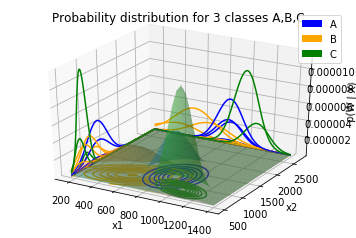

In [19]:
# Plot the likelihood for each class

from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')
x1off = min(X_axis)
x2off = max(Y_axis)



zoff = 0
ax.plot_surface(x, y, z1, rstride=3, cstride=3, alpha=0.3, label = 'A')
cset = ax.contour(x, y, z1, zdir='z', offset=zoff, colors="b")
cset = ax.contour(x, y, z1, zdir='x', offset=x1off, colors="b")
cset = ax.contour(x, y, z1, zdir='y', offset=x2off, colors="b")

ax.plot_surface(x, y, z2, rstride=3, cstride=3, alpha=0.3, label = 'B')
cset = ax.contour(x, y, z2, zdir='z', offset=zoff, colors="orange")
cset = ax.contour(x, y, z2, zdir='x', offset=x1off, colors="orange")
cset = ax.contour(x, y, z2, zdir='y', offset=x2off, colors="orange")

ax.plot_surface(x, y, z3, rstride=3, cstride=3, alpha=0.3, label = 'C')
cset = ax.contour(x, y, z3, zdir='z', offset=zoff, colors="g")
cset = ax.contour(x, y, z3, zdir='x', offset=x1off, colors="g")
cset = ax.contour(x, y, z3, zdir='y', offset=x2off, colors="g")

plt.title('Probability distribution for 3 classes A,B,C')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('p(W | X)')
#legends
blue_proxy = plt.Rectangle((0, 0), 1, 1, fc="b")
orange_proxy = plt.Rectangle((0, 0), 1, 1, fc="orange")
green_proxy = plt.Rectangle((0, 0), 1, 1, fc="g")
ax.legend([blue_proxy,orange_proxy,green_proxy],['A','B','C'])

plt.show()

In [20]:
# Assign probabilities to each class

prob_A = 1/3
prob_B = 1/3
prob_C = 1/3

In [21]:
# Calculate discriminant function for each class
# Calculate a posteriori for each class and plot it

def decision_function(sigma, mu, p):
    iSigma = np.linalg.inv(sigma)
    A = -0.5*iSigma
    B = np.matmul(iSigma, mu)
    C = -0.5*np.matmul(np.matmul(np.transpose(mu), iSigma), mu) -0.5*np.log(np.linalg.det(iSigma)) + np.log(p)
    
    #C + B0 x1 + A00 x1^2 + B1 x2 + A01 x1 x2 + A10 x1 x2 + A11 x2^2
    return np.array([C[0][0], B[0][0], A[0][0], B[1], A[0][1], A[1][0], A[1][1]])


# find the equation of the decision boundary for AB, BC, AC
def decision_line(sigma1, sigma2, mu1, mu2, p1, p2):
    threshold = 0
    return decision_function(sigma1, mu1, p1)-decision_function(sigma2, mu2, p2) + threshold


In [117]:
def classifier(sigma_A, sigma_B, sigma_C):

    #g12
    cof1 = decision_line(sigma_A, sigma_B, mu_A, mu_B, prob_A, prob_B)

    #g13
    cof2 = decision_line(sigma_A, sigma_C, mu_A, mu_C, prob_A, prob_C)

    #g23
    cof3 = decision_line(sigma_B, sigma_C, mu_B, mu_C, prob_B, prob_C)
  
    z1 = cof1[0] + cof1[1]*x + cof1[2]*x**2 + cof1[3]*y + (cof1[4]+cof1[5])*x*y + cof1[6]*y**2   #
    z2 = cof2[0] + cof2[1]*x + cof2[2]*x**2 + cof2[3]*y + (cof2[4]+cof2[5])*x*y + cof2[6]*y**2   #
    z3 = cof3[0] + cof3[1]*x + cof3[2]*x**2 + cof3[3]*y + (cof3[4]+cof3[5])*x*y + cof3[6]*y**2   #
    
    
    plt.figure()


    CS = plt.contour(x, y, z1, levels=[0], colors=('black'))
    fmt = {}
    strs = ['AB']
    for l, s in zip(CS.levels, strs):
        fmt[l] = s
    # Label every other level using strings
    plt.clabel(CS, CS.levels[::2], inline=True, fmt=fmt, fontsize=10)
    CS = plt.contour(x, y, z2, levels=[0], colors=('black'))
    fmt = {}
    strs = ['AC']
    for l, s in zip(CS.levels, strs):
        fmt[l] = s
    # Label every other level using strings
    plt.clabel(CS, CS.levels[::2], inline=True, fmt=fmt, fontsize=10)
    CS = plt.contour(x, y, z3, levels=[0], colors=('black'))
    fmt = {}
    strs = ['BC']
    for l, s in zip(CS.levels, strs):
        fmt[l] = s
    # Label every other level using strings
    plt.clabel(CS, CS.levels[::2], inline=True, fmt=fmt, fontsize=10)


    # FIX THIS CASE NUMBER ISSUE
    plt.title('Case 3 for arbitary Sigma')

    plt.scatter(cA[:,0], cA[:,1], c='red', alpha=0.5, label='class A')
    plt.scatter(cB[:,0], cB[:,1], c='blue', alpha=0.5, label='class B')
    plt.scatter(cC[:,0], cC[:,1], c='green', alpha=0.5, label='class C')

    plt.legend()
    plt.show()
    
    return

In [118]:
''''
1 -- Bayes with Covariance same for all classes

2 -- Bayes with Covariance different for all classes

3 -- Naive Bayes with C = \sigma^2*I.

4 -- Naive Bayes with C same for all classes.

5 -- Naive Bayes with C different for all classes.
'''

# Simple Bayes Classifier

# Case 1
sigma_A1 = cov_B
sigma_B1 = cov_B
sigma_C1 = cov_B

# Case 2
sigma_A2 = cov_C
sigma_B2 = cov_B
sigma_C2 = cov_C

# Naive Bayes Classifier
# Make off diagonal entries zero
cov_A_naive = np.diag(np.diag(cov_A))
cov_B_naive = np.diag(np.diag(cov_B))
cov_C_naive = np.diag(np.diag(cov_C))

# Case 3
s = cov_A[1, 1]
I = np.identity(2)

sigma_A3 = np.diag(s * np.diag(I))
sigma_B3 = np.diag(s * np.diag(I))
sigma_C3 = np.diag(s * np.diag(I))

# Case 4
sigma_A4 = cov_C_naive
sigma_B4 = cov_C_naive
sigma_C4 = cov_C_naive

# Case 5
sigma_A5 = cov_A_naive
sigma_B5 = cov_B_naive
sigma_C5 = cov_C_naive


In [119]:
sigma_A = sigma_A5
sigma_B = sigma_B5
sigma_C = sigma_C5

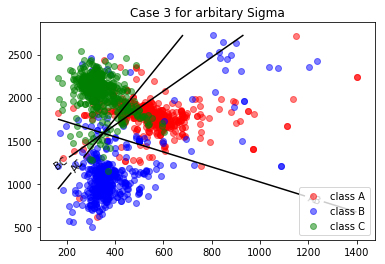

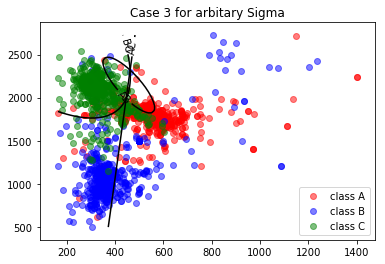

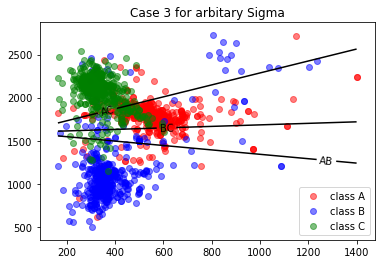

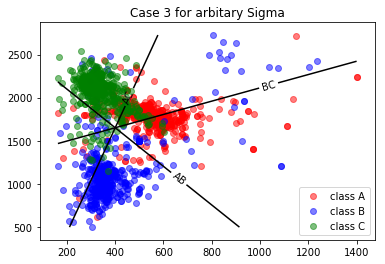

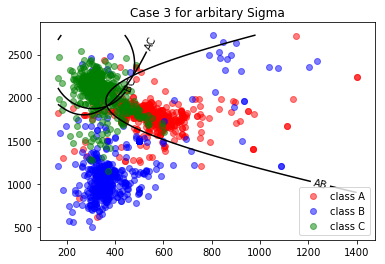

In [120]:
classifier(sigma_A1, sigma_B1, sigma_C1) # Case 1
classifier(sigma_A2, sigma_B2, sigma_C2) # Case 2
classifier(sigma_A3, sigma_B3, sigma_C3) # Case 3
classifier(sigma_A4, sigma_B4, sigma_C4)  # Case 4
classifier(sigma_A5, sigma_B5, sigma_C5) # Case 5

In [105]:
# Concatenate all test data in one array
# remember that each class test data has 150 observations

test_data = np.vstack((cA_test, cB_test))
test_data = np.vstack((test_data, cC_test))

In [106]:
# Actual classes or Target Classes
actualValues = np.array([1]*cA_test.shape[0]+[2]*cB_test.shape[0]+[3]*cC_test.shape[0]).reshape(-1,1)

In [107]:
def decide(x):
    x1,x2 = x
    
    #C + B0 x1 + A00 x1^2 + B1 x2 + A01 x1 x2 + A10 x1 x2 + A11 x2^2
    cof1 = decision_function(sigma_A, mu_A, prob_A)
    cof2 = decision_function(sigma_B, mu_B, prob_B)
    cof3 = decision_function(sigma_C, mu_C, prob_C)
    
    
    z1 = cof1[0] + cof1[1]*x1 + cof1[2]*x1**2 + cof1[3]*x2 + (cof1[4]+cof1[5])*x1*x2 + cof1[6]*x2**2   #
    z2 = cof2[0] + cof2[1]*x1 + cof2[2]*x1**2 + cof2[3]*x2 + (cof2[4]+cof2[5])*x1*x2 + cof2[6]*x2**2   #
    z3 = cof3[0] + cof3[1]*x1 + cof3[2]*x1**2 + cof3[3]*x2 + (cof3[4]+cof3[5])*x1*x2 + cof3[6]*x2**2   #
    
    if z1>z2 and z1>z3:
        return 1
    elif z2>z1 and z2>z3:
        return 2
    elif z3>z1 and z3>z2:
        return 3
    else:
        return -1

In [108]:
def decide_roc(x):
    x1,x2 = x
    
    #C + B0 x1 + A00 x1^2 + B1 x2 + A01 x1 x2 + A10 x1 x2 + A11 x2^2
    cof1 = decision_function(sigma_A, mu_A, prob_A)
    cof2 = decision_function(sigma_B, mu_B, prob_B)
    cof3 = decision_function(sigma_C, mu_C, prob_C)
    
    
    z1 = cof1[0] + cof1[1]*x1 + cof1[2]*x1**2 + cof1[3]*x2 + (cof1[4]+cof1[5])*x1*x2 + cof1[6]*x2**2   #
    z2 = cof2[0] + cof2[1]*x1 + cof2[2]*x1**2 + cof2[3]*x2 + (cof2[4]+cof2[5])*x1*x2 + cof2[6]*x2**2   #
    z3 = cof3[0] + cof3[1]*x1 + cof3[2]*x1**2 + cof3[3]*x2 + (cof3[4]+cof3[5])*x1*x2 + cof3[6]*x2**2   #

    return np.array([z1, z2, z3])

In [109]:
# Actual classes or Target Classes
actualValues = np.array([1]*cA_test.shape[0]+[2]*cB_test.shape[0]+[3]*cC_test.shape[0]).reshape(-1,1)
# Predicted classes
predictedValues = np.array([decide(i) for i in test_data])
predictedValues_score = np.array([decide_roc(i) for i in test_data])

In [110]:
# Implementation of Liklihood function
# Bivariate Gaussian Distribution
def likelihood(x1, x2, mu, cov):
    x = np.vstack((x1,x2))
    
    coeff = 1/(2*np.pi*np.linalg.det(cov)**0.5)
    exp_term = (np.e**(-0.5 * np.matmul(np.matmul(np.transpose((x-mu)), np.linalg.inv(cov)), (x-mu))))
    
    return (coeff * exp_term).reshape(1) #

In [111]:
def posterior(x, mu, cov, p):
    x1, x2 = x
    return (likelihood(x1, x2, mu, cov) * p)

In [112]:
actual = np.array([1]*cA_test.shape[0] + [2]*cB_test.shape[0] + [3]*cC_test.shape[0]).reshape(-1,1)

In [113]:
no_of_test_points = test_data.shape[0]
no_of_classes = 3
score = np.ones((no_of_test_points, no_of_classes))

for i in range(0, no_of_test_points):
    z1 = z2 = z3 = 0
    z1 = posterior(test_data[i], mu_A, sigma_A, prob_A)
    z2 = posterior(test_data[i], mu_B, sigma_B, prob_B)
    z3 = posterior(test_data[i], mu_C, sigma_C, prob_C)
    score[i][0] = z1 / (z1+z2+z3)
    score[i][1] = z2/ (z1+z2+z3)
    score[i][2] = z3 / (z1+z2+z3)

In [114]:
from sklearn.metrics import roc_curve, auc
no_of_test_points = test_data.shape[0]                                 #N, n, =, +
no_of_classes = 3

TP = 0
FP = 0
FN = 0
TN = 0

TPR5 = []
FPR5 = []
roc_auc = []
t = []
for threshold in np.arange(0, 1, 0.05):
    t.append(threshold)
    TP = 0
    FP = 0
    FN = 0
    TN = 0
    for i in range(0, no_of_test_points):
        for j in range(0, no_of_classes):
            if actual[i] == j+1:
                if score[i][j] >= threshold:  
                    TP = TP+1
                elif score[i][j] < threshold:
                    FN = FN+1
            else:
                if score[i][j] >= threshold:
                    FP = FP+1
                elif score[i][j] < threshold:
                    TN = TN+1
    tpr = TP / (TP + FN)  
    fpr = FP / (FP + TN)
    TPR5.append(tpr)
    FPR5.append(fpr)
    #roc_auc.append(auc(fpr, tpr))

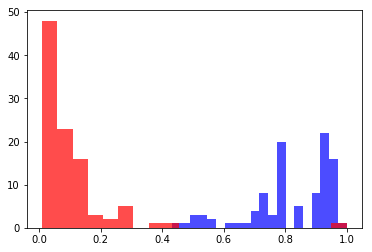

In [115]:
plt.hist(TPR,20, alpha=0.7, label='C', color='blue')
plt.hist(FPR,20, alpha=0.7, label='C', color='red')
plt.show()

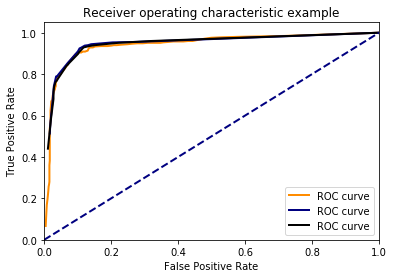

In [116]:
plt.figure()
lw = 2
plt.plot(FPR1, TPR1, color='darkorange', lw=lw, label='ROC curve')
plt.plot(FPR2, TPR2, color='navy', lw=lw, label='ROC curve')
plt.plot(FPR5, TPR5, color='black', lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [634]:
# Plot Confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[134   4  12]
 [ 30 113   7]
 [ 11   2 137]]
Normalized confusion matrix
[[ 0.89  0.03  0.08]
 [ 0.2   0.75  0.05]
 [ 0.07  0.01  0.91]]


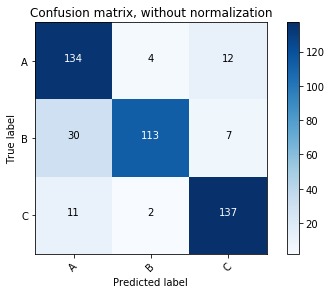

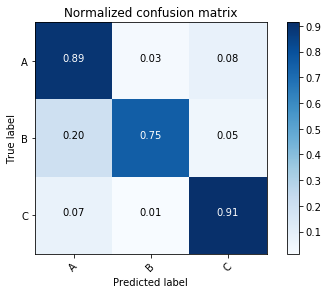

In [635]:
# Calculate confusion matrix

# Compute confusion matrix
cnf_matrix = confusion_matrix(actualValues, predictedValues)
np.set_printoptions(precision=2)
class_names = ['A', 'B', 'C'];

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [66]:
predictedValues = label_binarize(predictedValues, classes=[1,2,3])
actualValues = label_binarize(actualValues, classes=[1,2,3])

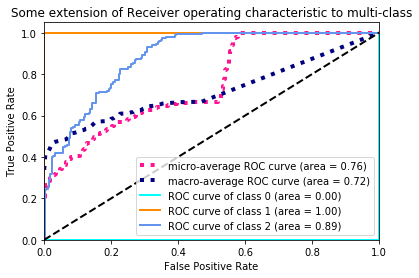

In [70]:
from scipy import interp
from itertools import cycle

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()